In [6]:
import PyCosmoMMF
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PyCosmoMMF.test_print()

Hello World! This is an installation test. If you see this, the installation was successful.


In [6]:
def shrink(data, new_size):
    xs = new_size
    ys = new_size
    zs = new_size
    return data.reshape(xs, data.shape[0]//xs, ys, data.shape[1]//ys, zs, data.shape[2]//zs).sum(axis=1).sum(axis=2).sum(axis=3)

In [3]:
density_field = np.load("../density_cube_512_4.npy") + 1
density_field_small = PyCosmoMMF.shrink(density_field, 64)

In [4]:
max_signatures = PyCosmoMMF.maximum_signature([np.sqrt(2)**n for n in range(0,5)], 
                                   density_field_small, 
                                   alg='NEXUS')

In [12]:
kv = PyCosmoMMF.wavevectors3D((density_field.shape))
f = PyCosmoMMF.smooth_gauss(density_field, 1.0, kv)

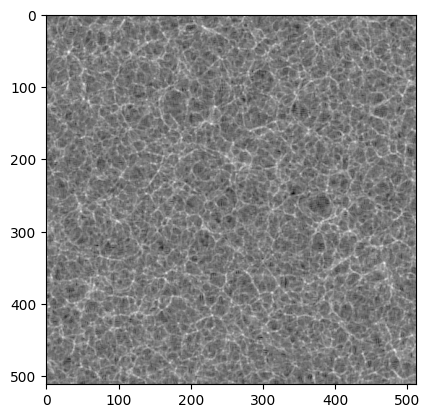

In [16]:
plt.imshow(np.log10(density_field[0]), cmap='gray')

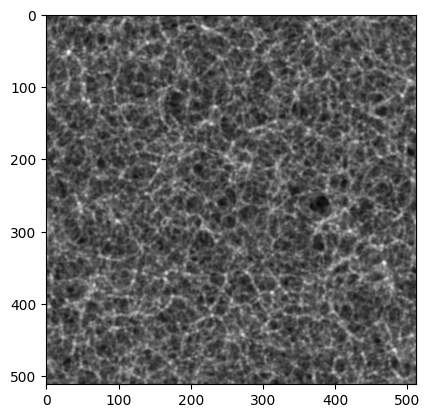

In [17]:
plt.imshow(np.log10(f[0]), cmap='gray')